# Table of Contents
 <p>

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sympy import init_printing, Matrix, symbols, sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
init_printing(use_latex = 'mathjax')

In [2]:
%qtconsole

In [30]:
%%javascript
console.log($("div#notebook-container").width(1700))

<IPython.core.display.Javascript object>

In [31]:
tceColmns = pd.read_csv("../../../data/tce_computed/tce_collist.csv")
tceRawData = pd.read_csv("../../../data/tce_computed/tce_rawdata.csv")
tceTransformedData = pd.read_csv("../../../data/tce_computed/tce_pcaTransformedData.csv")
tceEigenvalues = pd.read_csv("../../../data/tce_computed/tce_eigenvalues.csv")
correlation = pd.read_csv("../../../data/tce_computed/tce_Parameter_PC_correlation.csv", index_col=0)

In [32]:
tceEigenvalues.astype(object)

,Component,Eigenvalue,Proportion (%),Cumulative (%)
0,PC1,7.4114,19,19
1,PC2,5.30315,13.6,32.6
2,PC3,3.30398,8.47,41.07
3,PC4,2.84707,7.3,48.37
4,PC5,2.57537,6.6,54.97
5,PC6,2.17668,5.58,60.55
6,PC7,1.63915,4.2,64.75
7,PC8,1.43721,3.69,68.44
8,PC9,1.33558,3.42,71.86
9,PC10,1.16966,3,74.86


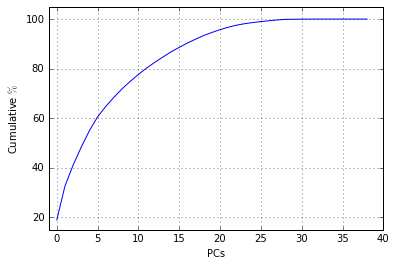

In [50]:
# tceEigenvalues[['Proportion (%)', 'Cumulative (%)']].plot()
ax = tceEigenvalues[['Cumulative (%)']].plot(legend=False, ylim=(15,105), xlim=(-1,40), grid=True)
ax.set_ylabel('Cumulative $\%$')
ax.set_xlabel('PCs')
# tceEigenvalues[['Proportion (%)']].plot()

In [51]:
ncorr = correlation[["PC%s" % (i) for i in range(20)]][:34]

In [52]:
ncorr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
boot_messtd,0.985574,-0.027219,-0.038250,-0.020681,-0.061510,-0.038710,-0.002299,-0.122926,-0.040873,0.000758,-0.008070,0.006975,0.000096,0.001722,0.005396,0.002983,-0.000049,-0.001363,0.001666,-0.000614
tce_slogg,-0.008377,-0.196582,-0.030539,0.582000,-0.426112,0.453474,0.108778,-0.088895,0.167837,-0.008407,-0.020047,0.000907,-0.003215,-0.026686,0.018331,-0.082037,0.118731,0.226170,0.069193,0.115966
tce_mesmad,0.108973,-0.139566,0.285851,0.204781,0.689681,0.177966,0.006295,-0.239434,-0.016849,0.013128,0.002678,-0.030023,-0.041223,0.039783,-0.027054,-0.108399,-0.037937,0.039507,-0.048449,0.038460
tce_model_snr,0.007639,0.029348,0.275337,0.429099,0.035330,-0.414147,0.029271,-0.050386,0.120315,-0.157082,0.390553,-0.017415,0.078536,-0.003014,0.079152,-0.239292,-0.222343,0.026443,-0.474779,0.014569
tce_sma,0.036361,0.717049,0.469579,-0.350958,-0.103719,0.119687,0.049416,-0.041660,0.094336,-0.012640,0.021229,-0.011448,-0.077249,0.004791,0.192587,0.052784,-0.034528,-0.064958,-0.031411,0.021932
tce_duration,0.023914,0.254927,0.352592,-0.057272,-0.133736,0.031097,0.321123,0.048637,-0.232990,0.483072,0.248581,-0.198772,-0.231439,0.125190,-0.086572,-0.027623,0.222394,-0.348680,-0.085789,0.035491
tce_max_sngle_ev,0.996833,-0.029575,-0.025224,-0.014123,-0.026105,-0.009902,0.001120,-0.035423,-0.015227,-0.007196,0.002988,-0.003618,-0.001766,-0.000675,0.001339,0.001773,-0.001193,-0.000428,0.002030,-0.000959
tce_depth,0.028177,0.119758,0.373656,0.489657,0.021868,-0.386995,-0.190517,-0.046396,0.219631,0.077600,-0.219189,0.032679,-0.173612,-0.160870,-0.028421,-0.229395,0.062419,-0.214584,0.296993,-0.100851
tce_minmesd,0.026241,0.451038,0.346278,-0.300450,-0.051588,0.101336,0.060394,-0.099886,0.144451,-0.029149,0.061460,-0.017439,0.364379,-0.130931,-0.371001,-0.093300,0.024362,0.054975,0.039467,-0.412116
tce_rsnrmes,-0.035211,-0.133232,-0.297088,-0.002989,-0.081071,0.178459,0.390200,0.094717,-0.350317,0.129780,0.260108,-0.024812,0.297554,-0.090521,0.305768,-0.366790,-0.256072,-0.084765,0.276915,-0.056199


In [63]:
def formatcell(val):
    if val > 0.0:
        color = 'background-color: skyblue; color: black' if val >= 0.4  else 'color: black'
        color = 'background-color: deepskyblue; color: black' if val > 0.7 else color
    else: 
        color = 'background-color: lemonchiffon; color: black' if np.abs(val) >= 0.4  else 'color: black'
        color = 'background-color: moccasin; color: black' if np.abs(val) > 0.7 else color        
    return color
#print(ncorr[['PC0', 'PC1', 'PC2']].head())
ncorr[['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC9']].style.applymap(formatcell)

In [10]:
colFileName = 'asdfanothertce_colscsv'

print(len(s))
s = colFileName.split('.')
'.'.join(s[:-1]) + '_v1.' + s[-1]


NameError: name 's' is not defined

In [13]:
7.4114 + 5.30315 + 3.30398 + 2.84707 + 2.57537 + 2.17668 + 1.63915 + 1.43721 + 1.33558 + 1.16966 + 1.09168 + 1.0003 + 0.901048 + 0.836118 + 0.81133 + 0.7114 + 0.678007 + 0.602895 + 0.584217 + 0.472781 + 0.447496 + 0.380196 + 0.315781 + 0.234446 + 0.183911 + 0.153009 + 0.12802 + 0.123365 + 0.0969348 + 0.0174445 + 0.0152885

38.9849178

In [66]:
import numpy as np

In [69]:
np.tanh((0, np.pi*1j, np.pi*1j/2))

array([ 0. +0.00000000e+00j,  0. -1.22464680e-16j,  0. +1.63312394e+16j])